In [18]:
import pandas as pd 
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import sklearn as sk

In [19]:
df=pd.read_csv("StudentsPerformance.csv")
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.599000,69.269000,68.454000
std,28.436048,14.856964,16.569503
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,714.000000,157.000000,192.000000


In [20]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: ylabel='writing score'>

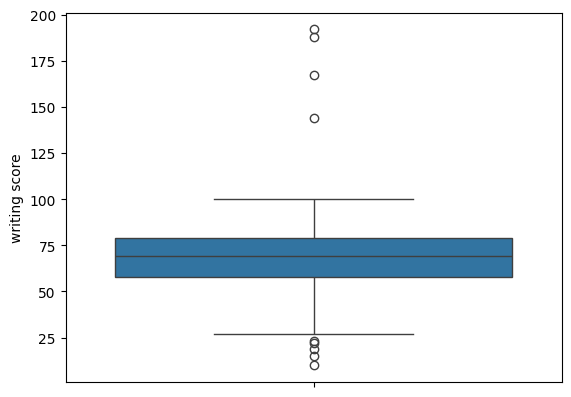

In [21]:
sb.boxplot(df["writing score"])

<Axes: ylabel='math score'>

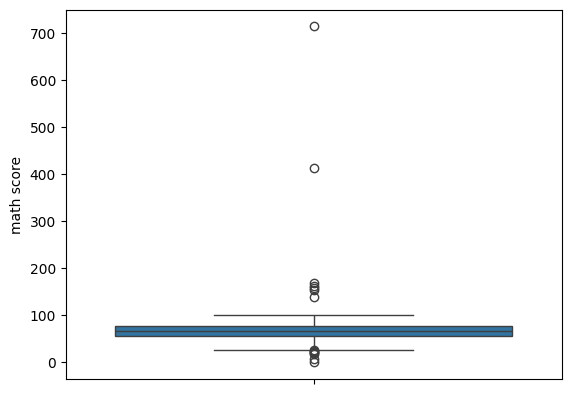

In [22]:
sb.boxplot(df["math score"])


<Axes: ylabel='math score'>

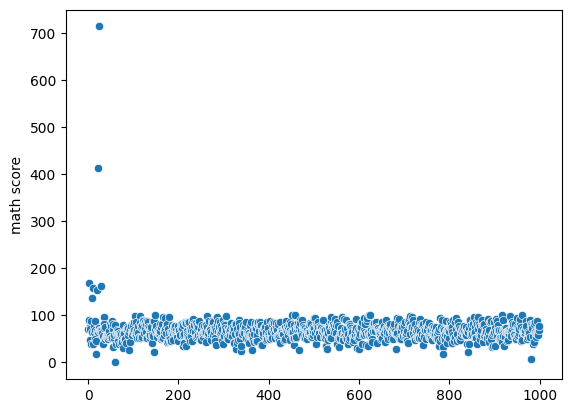

In [23]:
sb.scatterplot(df["math score"])

In [24]:
uq=df["parental level of education"].unique()
uq

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [25]:
df["lunch"]=LabelEncoder().fit_transform(df["lunch"])
df["test preparation course"]=LabelEncoder().fit_transform(df["test preparation course"]=="completed")
df["gender"]=LabelEncoder().fit_transform(df["gender"])
df["race/ethnicity"]=LabelEncoder().fit_transform(df["race/ethnicity"])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,bachelor's degree,1,0,72,72,74
1,0,2,some college,1,1,169,90,188
2,0,1,master's degree,1,0,90,95,93
3,1,0,associate's degree,0,0,47,157,144
4,1,2,some college,1,0,76,78,75


In [26]:
df.describe()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,2.174000,0.645000,0.358000,67.599000,69.269000,68.454000
std,0.499926,1.157179,0.478753,0.479652,28.436048,14.856964,16.569503
min,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,10.000000
25%,0.000000,1.000000,0.000000,0.000000,57.000000,59.000000,58.000000
50%,0.000000,2.000000,1.000000,0.000000,66.000000,70.000000,69.000000
75%,1.000000,3.000000,1.000000,1.000000,77.000000,79.250000,79.000000
max,1.000000,4.000000,1.000000,1.000000,714.000000,157.000000,192.000000


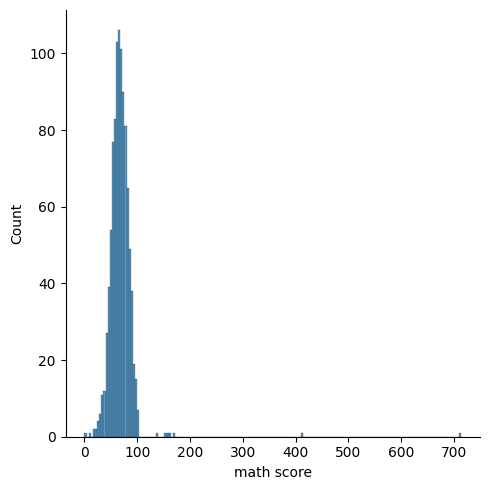

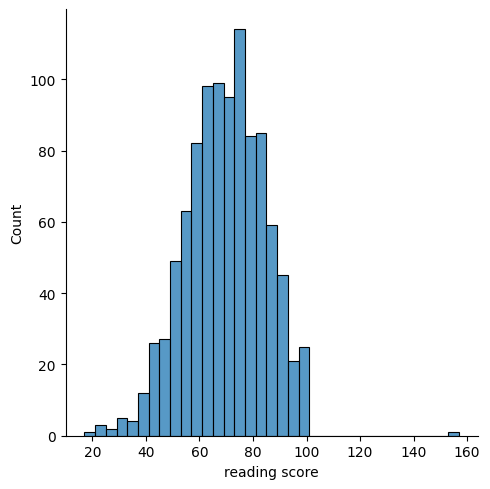

In [27]:
sb.displot(df["math score"])
sb.displot(df["reading score"])

### IQR Method to remove outliers

In [28]:
columns=["writing score", "math score", "reading score"]
rowsToDelete = []
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # print(lower,upper)
    upper_array = np.where(df[col] >= upper)[0]
    lower_array = np.where(df[col] <= lower)[0]
    # print(upper_array,lower_array)    
    rowsToDelete.extend(upper_array)
    rowsToDelete.extend(lower_array)
    
rowsToDelete = list(set(rowsToDelete))
df = df.drop(index=rowsToDelete)
df.describe()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,0.483607,2.182377,0.653689,0.361680,66.776639,69.737705,68.661885
std,0.499987,1.158928,0.476038,0.480733,14.296254,13.937474,14.436791
min,0.000000,0.000000,0.000000,0.000000,29.000000,29.000000,27.000000
25%,0.000000,1.000000,0.000000,0.000000,57.000000,60.000000,58.000000
50%,0.000000,2.000000,1.000000,0.000000,67.000000,70.000000,69.000000
75%,1.000000,3.000000,1.000000,1.000000,77.000000,80.000000,79.000000
max,1.000000,4.000000,1.000000,1.000000,100.000000,100.000000,100.000000


### Data Transformation - MIN_MAX Normalization

In [29]:
# MIN MAX Normalization
df["math score"]=(df["math score"]-df["math score"].min())/(df["math score"].max()-df["math score"].min())
df["math score"]=round(df["math score"],2)
df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,bachelor's degree,1,0,0.61,72,74
2,0,1,master's degree,1,0,0.86,95,93
4,1,2,some college,1,0,0.66,78,75
5,0,1,associate's degree,1,0,0.59,83,78
7,1,1,some college,0,0,0.15,43,39


In [30]:
# Z-Score Normalization
df["reading score"]=(df["reading score"]-df["reading score"].mean())/df["reading score"].std()
df["reading score"]=round(df["reading score"],2)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,bachelor's degree,1,0,0.61,0.16,74
2,0,1,master's degree,1,0,0.86,1.81,93
4,1,2,some college,1,0,0.66,0.59,75
5,0,1,associate's degree,1,0,0.59,0.95,78
7,1,1,some college,0,0,0.15,-1.92,39


In [31]:
# Decimal Scaling
df["writing score"]=df["writing score"]/100
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,bachelor's degree,1,0,0.61,0.16,0.74
2,0,1,master's degree,1,0,0.86,1.81,0.93
4,1,2,some college,1,0,0.66,0.59,0.75
5,0,1,associate's degree,1,0,0.59,0.95,0.78
7,1,1,some college,0,0,0.15,-1.92,0.39
